In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mobile_price.csv')

In [3]:
X = df.drop('price_range', axis=1)
y = df['price_range'] 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
tree_clf = DecisionTreeClassifier(
    criterion='gini',   
    max_depth=6,        
    random_state=42
)

tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [6]:
y_pred = tree_clf.predict(X_test)


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       100
           1       0.81      0.74      0.77       100
           2       0.75      0.87      0.81       100
           3       0.95      0.86      0.90       100

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.85       400
weighted avg       0.85      0.84      0.85       400



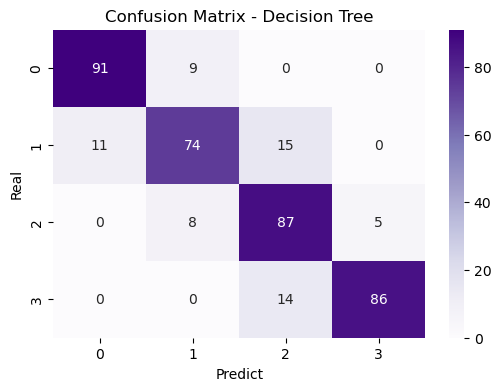

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predict")
plt.ylabel("Real")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

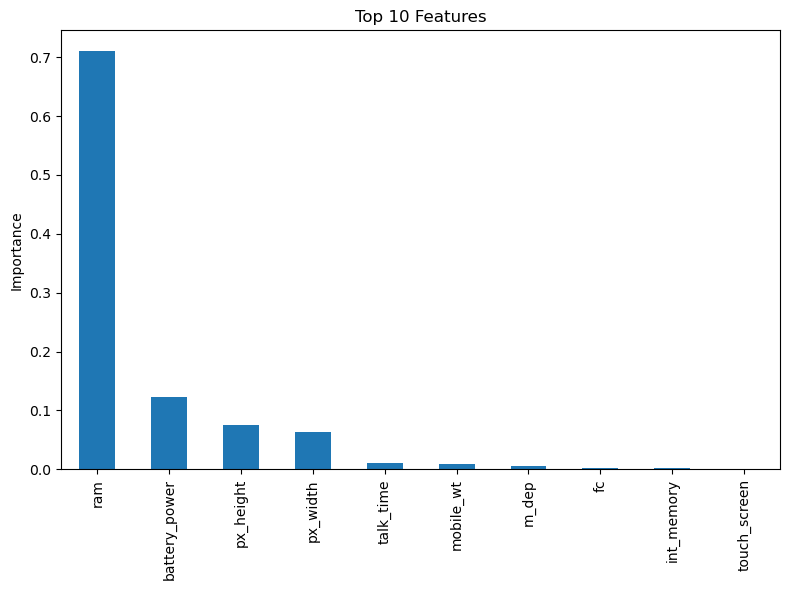

In [12]:
importances = tree_clf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

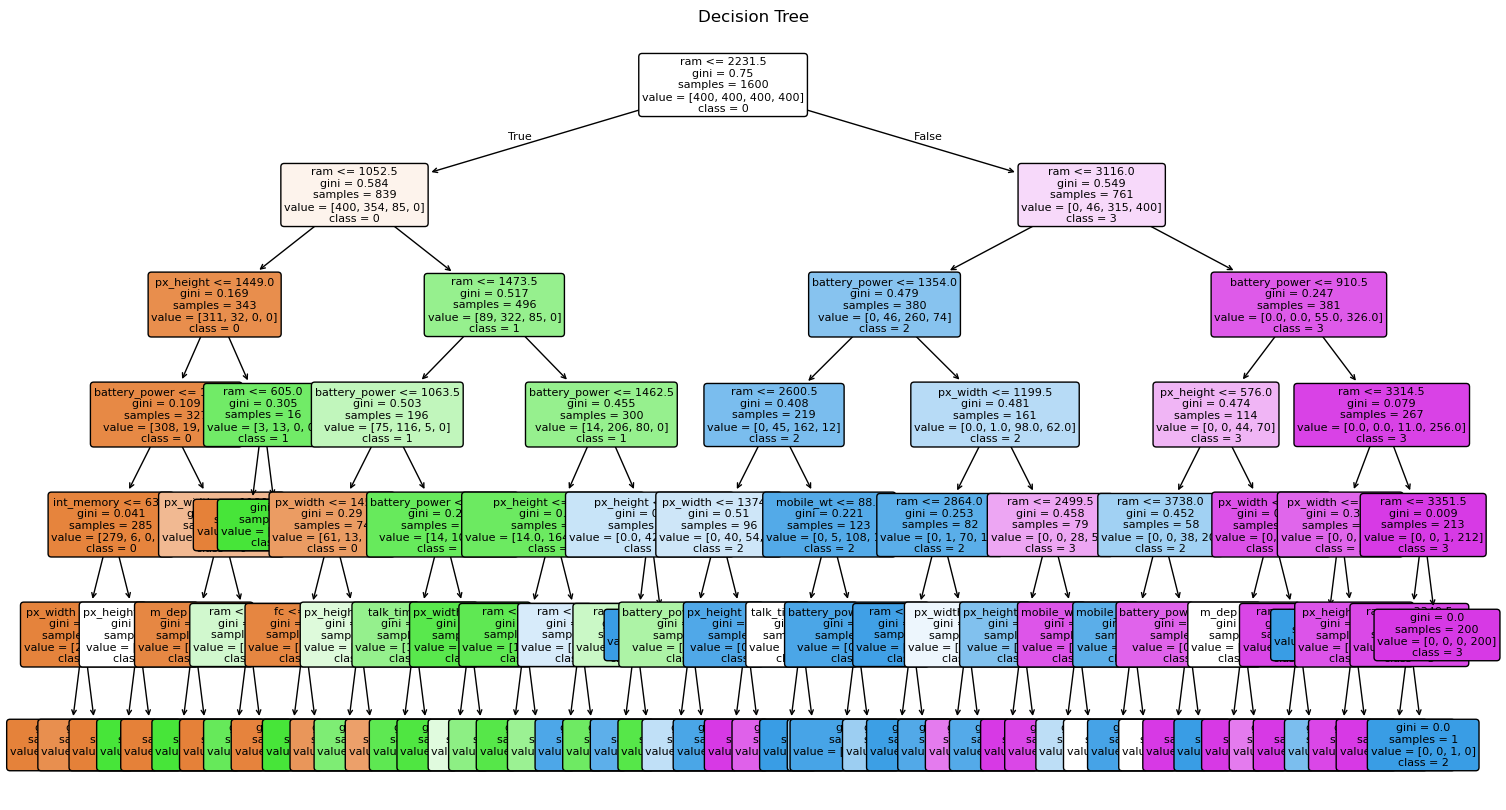

In [13]:
plt.figure(figsize=(18,10))
plot_tree(
    tree_clf,
    feature_names=feature_names,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree")
plt.show()
